

---


***OTHER APPLICATIONS OF ANT COLONY OPTIMIZATION***

---



**`Connection Oriented Network Routing`**

In [29]:
import networkx as nx
import random
import numpy as np
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 2, {'cost': 2, 'pheromone': 1, 'bandwidth': 10}),
                   (1, 3, {'cost': 3, 'pheromone': 1, 'bandwidth': 8}),
                   (2, 4, {'cost': 1, 'pheromone': 1, 'bandwidth': 5}),
                   (3, 4, {'cost': 4, 'pheromone': 1, 'bandwidth': 6}),
                   (4, 5, {'cost': 2, 'pheromone': 1, 'bandwidth': 7}),
                   (3, 5, {'cost': 3, 'pheromone': 1, 'bandwidth': 9})])
class AntColonyOptimization:
    def __init__(self, graph, colony_size, alpha=1.0, beta=2.0, evaporation_rate=0.5):
        self.graph = graph
        self.colony_size = colony_size
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_matrix = self.initialize_pheromones()
    def initialize_pheromones(self):
        pheromones = nx.get_edge_attributes(self.graph, 'pheromone')
        return {edge: pheromones.get(edge, 1.0) for edge in self.graph.edges()}
    def select_path(self, ant, available_paths):
        probabilities = [
            ((self.pheromone_matrix[edge] ** self.alpha) * (1.0 / self.graph[edge[0]][edge[1]]['cost']) ** self.beta) for
            edge in available_paths]
        probabilities /= np.sum(probabilities)
        selected_path = random.choices(available_paths, probabilities)[0]
        return selected_path
    def update_pheromones(self, ant_paths):
        self.pheromone_matrix = {edge: (1.0 - self.evaporation_rate) * pheromone for edge, pheromone in
                                 self.pheromone_matrix.items()}
        for path in ant_paths:
            total_cost = sum([1.0 / self.graph[edge[0]][edge[1]]['bandwidth'] for edge in path])
            pheromone_deposit = 1.0 / total_cost
            for i in range(len(path) - 1):
                edge = path[i]
                self.pheromone_matrix[edge] += pheromone_deposit
    def find_path(self, source, destination):
        ant_paths = []
        for _ in range(self.colony_size):
            current_node = source
            ant_path = []
            while current_node != destination:
                available_paths = [
                    (current_node, neighbor) for neighbor in self.graph.successors(current_node) if
                    (current_node, neighbor) not in ant_path]
                if not available_paths:
                    break
                selected_path = self.select_path(_, available_paths)
                ant_path.append(selected_path)
                current_node = selected_path[1]
            ant_paths.append(ant_path)
        self.update_pheromones(ant_paths)
        best_path = max(ant_paths, key=lambda path: sum([1.0 / self.graph[edge[0]][edge[1]]['bandwidth'] for edge in path]))
        return best_path
aco = AntColonyOptimization(G, colony_size=5, alpha=1.0, beta=2.0, evaporation_rate=0.5)
source_node = 1
destination_node = 5
best_route = aco.find_path(source_node, destination_node)
print("Best Route =", best_route)

Best Route = [(1, 2), (2, 4), (4, 5)]


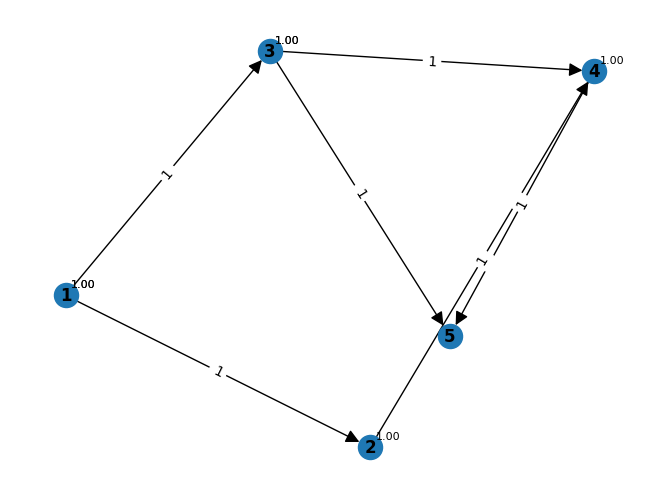

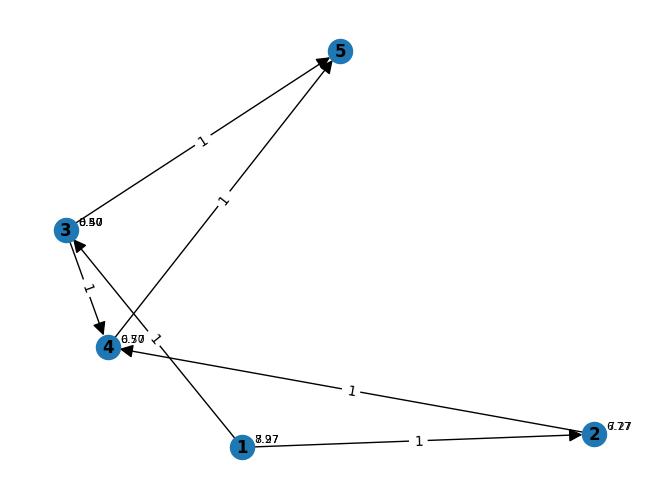

In [31]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 2, {'cost': 2, 'pheromone': 1, 'bandwidth': 10}),
                   (1, 3, {'cost': 3, 'pheromone': 1, 'bandwidth': 8}),
                   (2, 4, {'cost': 1, 'pheromone': 1, 'bandwidth': 5}),
                   (3, 4, {'cost': 4, 'pheromone': 1, 'bandwidth': 6}),
                   (4, 5, {'cost': 2, 'pheromone': 1, 'bandwidth': 7}),
                   (3, 5, {'cost': 3, 'pheromone': 1, 'bandwidth': 9})])
class AntColonyOptimization:
    def __init__(self, graph, colony_size, alpha=1.0, beta=2.0, evaporation_rate=0.5):
        self.graph = graph
        self.colony_size = colony_size
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_matrix = self.initialize_pheromones()
    def initialize_pheromones(self):
        pheromones = nx.get_edge_attributes(self.graph, 'pheromone')
        return {edge: pheromones.get(edge, 1.0) for edge in self.graph.edges()}
    def select_path(self, ant, available_paths):
        probabilities = [
            ((self.pheromone_matrix[edge] ** self.alpha) * (1.0 / self.graph[edge[0]][edge[1]]['cost']) ** self.beta) for
            edge in available_paths]
        probabilities /= np.sum(probabilities)
        selected_path = random.choices(available_paths, probabilities)[0]
        return selected_path
    def update_pheromones(self, ant_paths):
        self.pheromone_matrix = {edge: (1.0 - self.evaporation_rate) * pheromone for edge, pheromone in
                                 self.pheromone_matrix.items()}
        for path in ant_paths:
            total_cost = sum([1.0 / self.graph[edge[0]][edge[1]]['bandwidth'] for edge in path])
            pheromone_deposit = 1.0 / total_cost
            for i in range(len(path) - 1):
                edge = path[i]
                self.pheromone_matrix[edge] += pheromone_deposit
                reverse_edge = (edge[1], edge[0])
                self.pheromone_matrix[reverse_edge] = self.pheromone_matrix.get(reverse_edge, 0.0) + pheromone_deposit
    def find_path(self, source, destination):
        ant_paths = []
        for _ in range(self.colony_size):
            current_node = source
            ant_path = []
            while current_node != destination:
                available_paths = [
                    (current_node, neighbor) for neighbor in self.graph.successors(current_node) if
                    (current_node, neighbor) not in ant_path]
                if not available_paths:
                    break
                selected_path = self.select_path(_, available_paths)
                ant_path.append(selected_path)
                current_node = selected_path[1]
            ant_paths.append(ant_path)
        self.update_pheromones(ant_paths)
        best_path = max(ant_paths, key=lambda path: sum([1.0 / self.graph[edge[0]][edge[1]]['bandwidth'] for edge in path]))
        return best_path
def plot_graph(graph, pheromone_matrix):
    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'pheromone')
    nx.draw(graph, pos, with_labels=True, font_weight='bold', arrowsize=20)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    for edge, pheromone in pheromone_matrix.items():
        plt.text(pos[edge[0]][0] + 0.02, pos[edge[0]][1] + 0.02, f'{pheromone:.2f}', fontsize=8)
    plt.show()
aco = AntColonyOptimization(G, colony_size=5, alpha=1.0, beta=2.0, evaporation_rate=0.5)
source_node = 1
destination_node = 5
plot_graph(G, aco.pheromone_matrix)
best_route = aco.find_path(source_node, destination_node)
plot_graph(G, aco.pheromone_matrix)

In [1]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 33 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

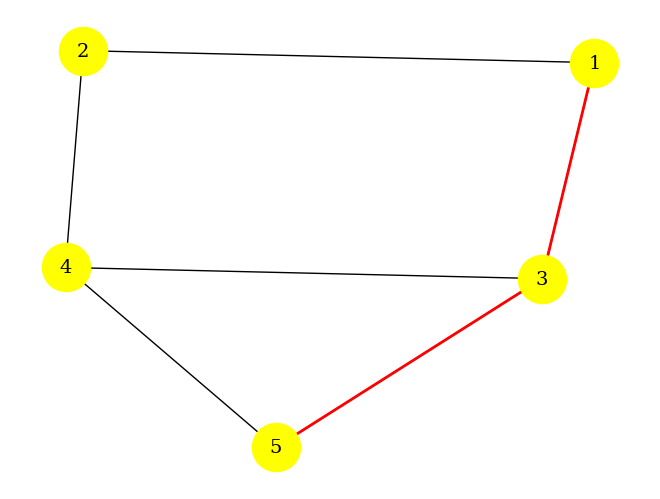

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from concurrent.futures import ThreadPoolExecutor
def initialize_pheromones(graph):
    pheromones = {}
    for edge in graph.edges():
        pheromones[edge] = 1.0
        reverse_edge = (edge[1], edge[0])
        pheromones[reverse_edge] = 1.0
    return pheromones
def update_pheromones(pheromones, ant_paths, evaporation_rate=0.1):
    for edge in pheromones:
        pheromones[edge] *= (1 - evaporation_rate)
    for path in ant_paths:
        path_length = len(path)
        for i in range(path_length - 1):
            edge = (path[i], path[i + 1])
            reverse_edge = (path[i + 1], path[i])
            pheromones[edge] += 1.0 / path_length
            pheromones[reverse_edge] += 1.0 / path_length
def ant_colony_optimization_parallel(graph, source, destinations, num_ants=5, num_iterations=50, evaporation_rate=0.1):
    pheromones = initialize_pheromones(graph)
    best_path = None
    best_path_length = float('inf')
    def ant_path_iteration(ant_id):
        current_node = source
        path = [current_node]
        while current_node not in destinations:
            possible_edges = list(graph.edges(current_node))
            probabilities = [pheromones[edge] for edge in possible_edges]
            selected_edge = random.choices(possible_edges, probabilities)[0]
            current_node = selected_edge[1]
            path.append(current_node)
        return path
    with ThreadPoolExecutor() as executor:
        ant_paths = list(executor.map(ant_path_iteration, range(num_ants)))
    for path in ant_paths:
        if len(path) < best_path_length:
            best_path = path
            best_path_length = len(path)
    update_pheromones(pheromones, ant_paths, evaporation_rate)
    return best_path
def visualize_network(graph, best_route):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=1200, node_color='yellow', font_size=14, font_family='serif')
    nx.draw_networkx_edges(graph, pos, edgelist=[(best_route[i], best_route[i + 1]) for i in range(len(best_route) - 1)],
                           edge_color='red', width=2)
    plt.show()
G = nx.Graph()
G.add_nodes_from(range(1, 6))
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 5)])
source_node = 1
destination_nodes = [4, 5]
num_ants = 10
num_iterations = 100
evaporation_rate = 0.05
best_route = ant_colony_optimization_parallel(G, source_node, destination_nodes, num_ants, num_iterations, evaporation_rate)
visualize_network(G, best_route)

**`Connectionless Network Routing`**

In [57]:
import random
class AntColony:
    def __init__(self, graph, n_ants, alpha=1, beta=2, evaporation=0.5, Q=1):
        self.graph = graph
        self.pheromone = [[1] * len(graph[0]) for _ in range(len(graph))]
        self.all_ants = []
        self.n_ants = n_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation = evaporation
        self.Q = Q
    def run(self, iterations):
        for _ in range(iterations):
            self.all_ants = []
            for ant in range(self.n_ants):
                self.all_ants.append(self._run_ant())
            self._update_pheromone()
    def _run_ant(self):
        ant = Ant(self.graph)
        while not ant.finished():
            ant.move(self.pheromone, self.alpha, self.beta)
        return ant
    def _update_pheromone(self):
        for i, row in enumerate(self.pheromone):
            for j, col in enumerate(row):
                evaporation = (1 - self.evaporation) * self.pheromone[i][j]
                pheromone_change = 0
                for ant in self.all_ants:
                    if (i, j) in ant.visited_edges:
                        pheromone_change += self.Q / ant.total_distance()
                self.pheromone[i][j] = evaporation + pheromone_change
class Ant:
    def __init__(self, graph):
        self.graph = graph
        self.visited_nodes = set()
        self.visited_edges = []
        self.current_node = random.randint(0, len(graph) - 1)
    def move(self, pheromone, alpha, beta):
        allowed_nodes = [node for node in range(len(pheromone)) if node not in self.visited_nodes]
        if not allowed_nodes:
            return
        probabilities = [self._calculate_probability(pheromone[self.current_node][node], self.graph[self.current_node][node], alpha, beta) for node in allowed_nodes]
        selected_node = self._select_node(allowed_nodes, probabilities)
        self.visited_edges.append((self.current_node, selected_node))
        self.visited_nodes.add(selected_node)
        self.current_node = selected_node
    def _calculate_probability(self, pheromone, distance, alpha, beta):
        distance = max(distance, 0.0001)
        return (pheromone ** alpha) * ((1 / distance) ** beta)
    def _select_node(self, nodes, probabilities):
        selected_node = random.choices(nodes, weights=probabilities)[0]
        return selected_node
    def total_distance(self):
        distance = 0
        for edge in self.visited_edges:
            distance += self.graph[edge[0]][edge[1]]
        return distance
    def finished(self):
        return len(self.visited_nodes) == len(self.graph)
graph = [
    [0, 2, 3, 4],
    [2, 0, 5, 6],
    [3, 5, 0, 7],
    [4, 6, 7, 0]
]
aco = AntColony(graph, n_ants=5)
aco.run(iterations=100)
best_ant = min(aco.all_ants, key=lambda ant: ant.total_distance())
print(f"Best path = {best_ant.visited_edges} \nTotal distance = {best_ant.total_distance()}")

Best path = [(3, 3), (3, 2), (2, 0), (0, 1)] 
Total distance = 12


In [65]:
import random
import pygraphviz as pgv
from IPython.display import Image
class AntColony:
    def __init__(self, graph, n_ants, alpha=1, beta=2, evaporation=0.5, Q=1):
        self.graph = graph
        self.pheromone = [[1] * len(graph[0]) for _ in range(len(graph))]
        self.all_ants = []
        self.n_ants = n_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation = evaporation
        self.Q = Q
    def run(self, iterations):
        for _ in range(iterations):
            self.all_ants = []
            for ant in range(self.n_ants):
                self.all_ants.append(self._run_ant())
            self._update_pheromone()
    def _run_ant(self):
        ant = Ant(self.graph)
        while not ant.finished():
            ant.move(self.pheromone, self.alpha, self.beta)
        return ant
    def _update_pheromone(self):
        for i, row in enumerate(self.pheromone):
            for j, col in enumerate(row):
                evaporation = (1 - self.evaporation) * self.pheromone[i][j]
                pheromone_change = 0
                for ant in self.all_ants:
                    if (i, j) in ant.visited_edges:
                        pheromone_change += self.Q / ant.total_distance()
                self.pheromone[i][j] = evaporation + pheromone_change
    def visualize_graph(self):
        graph = pgv.AGraph(directed=True)
        for i in range(len(self.graph)):
            for j in range(len(self.graph[0])):
                graph.add_edge(i, j, label=f"{self.graph[i][j]} (pheromone: {self.pheromone[i][j]:.3f})")
        graph.layout(prog="dot")
        graph.draw("graph.png")
        return Image(filename="graph.png")
    def visualize_best_path(self, best_ant):
        graph = pgv.AGraph(directed=True)
        for edge in best_ant.visited_edges:
            graph.add_edge(edge[0], edge[1], label=str(self.graph[edge[0]][edge[1]]))
        graph.layout(prog="dot")
        graph.draw("best_path.png")
        return Image(filename="best_path.png")
class Ant:
    def __init__(self, graph):
        self.graph = graph
        self.visited_nodes = set()
        self.visited_edges = []
        self.current_node = random.randint(0, len(graph) - 1)
    def move(self, pheromone, alpha, beta):
        allowed_nodes = [node for node in range(len(pheromone)) if node not in self.visited_nodes]
        if not allowed_nodes:
            return
        probabilities = [self._calculate_probability(pheromone[self.current_node][node], self.graph[self.current_node][node], alpha, beta) for node in allowed_nodes]
        selected_node = self._select_node(allowed_nodes, probabilities)
        self.visited_edges.append((self.current_node, selected_node))
        self.visited_nodes.add(selected_node)
        self.current_node = selected_node
    def _calculate_probability(self, pheromone, distance, alpha, beta):
        distance = max(distance, 0.0001)
        return (pheromone ** alpha) * ((1 / distance) ** beta)
    def _select_node(self, nodes, probabilities):
        selected_node = random.choices(nodes, weights=probabilities)[0]
        return selected_node
    def total_distance(self):
        distance = 0
        for edge in self.visited_edges:
            distance += self.graph[edge[0]][edge[1]]
        return distance
    def finished(self):
        return len(self.visited_nodes) == len(self.graph)
graph = [
    [0, 2, 3, 4],
    [2, 0, 5, 6],
    [3, 5, 0, 7],
    [4, 6, 7, 0]
]
aco = AntColony(graph, n_ants=5)
aco.visualize_graph()
aco.run(iterations=100)
best_ant = min(aco.all_ants, key=lambda ant: ant.total_distance())
aco.visualize_best_path(best_ant)
print(f"Best path = {best_ant.visited_edges} \nTotal distance = {best_ant.total_distance()}")

Best path = [(1, 1), (1, 2), (2, 0), (0, 3)] 
Total distance = 12


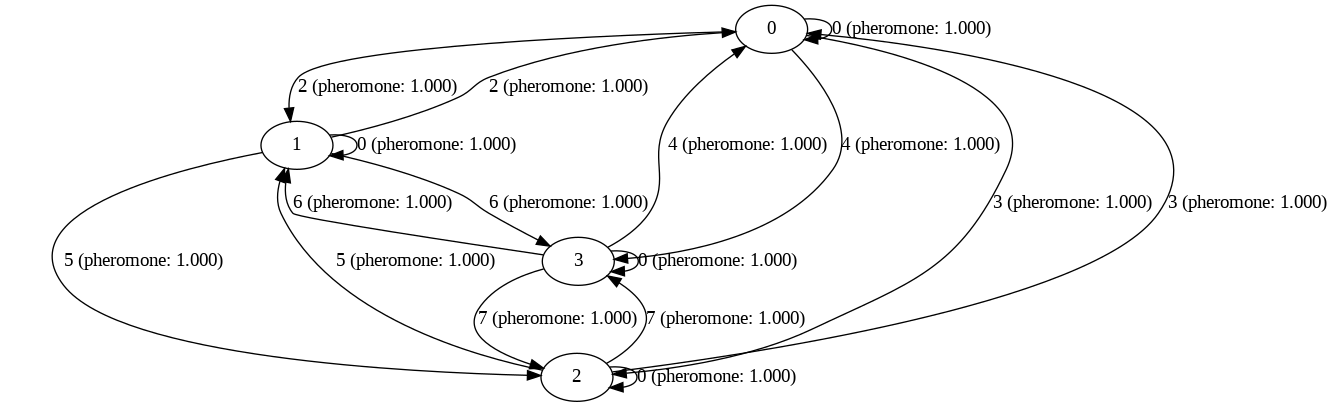